# VGG16 on Mnist Dataset

#### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


#### Loading the dataset

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


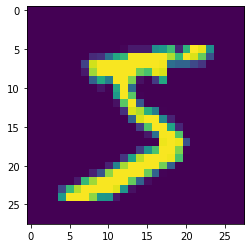

In [3]:
plt.imshow(x_train[0])

#### Resizing and Preprocessing the images
    - Initial size : (28x28)
    - Final size : (139x139)

In [0]:
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [0]:
rgb_list = []
dim = (139, 139)
for i in range(len(x_train)):
    rgb = to_rgb(x_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_train = np.squeeze(rgb_arr, axis=4)

In [0]:
rgb_list = []
for i in range(len(x_test)):
    rgb = to_rgb(x_test[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_test = np.squeeze(rgb_arr, axis=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


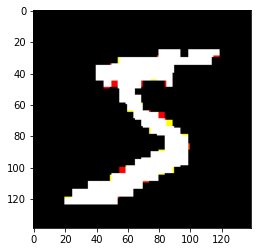

In [7]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)
plt.imshow(X_train[0])

In [8]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 139, 139, 3) (10000, 139, 139, 3) (60000, 10) (10000, 10)


#### Model Buiding

In [9]:
base = VGG16(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

58892288/58889256 [==============================] - 1s 0us/step


#### Freezing the base model layers

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              2101248   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 16,856,906
Trainable params: 2,142,218
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.5014 - accuracy: 0.8793 - val_loss: 0.1283 - val_accuracy: 0.9599
Epoch 2/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1342 - accuracy: 0.9567 - val_loss: 0.1084 - val_accuracy: 0.9662
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1038 - accuracy: 0.9659 - val_loss: 0.0917 - val_accuracy: 0.9715
Epoch 4/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0878 - accuracy: 0.9718 - val_loss: 0.0903 - val_accuracy: 0.9706
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0775 - accuracy: 0.9745 - val_loss: 0.0896 - val_accuracy: 0.9719
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0688 - accuracy: 0.9772 - val_loss: 0.0847 - val_accuracy: 0.9719
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/st

#### Model Performance Evaluation

In [0]:
from sklearn.metrics import precision_score,recall_score,log_loss

In [15]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.9897119341563786
Precision for class 1 = 0.9868766404199475
Precision for class 2 = 0.9821428571428571
Precision for class 3 = 0.9644619940769991
Precision for class 4 = 0.9915966386554622
Precision for class 5 = 0.9474835886214442
Precision for class 6 = 0.9852786540483701
Precision for class 7 = 0.9720347155255545
Precision for class 8 = 0.9723360655737705
Precision for class 9 = 0.9795291709314228
Mean Precision =  0.9771452259152207


In [17]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.9816326530612245
Recall for class 1 = 0.9938325991189427
Recall for class 2 = 0.9593023255813954
Recall for class 3 = 0.9673267326732673
Recall for class 4 = 0.9613034623217923
Recall for class 5 = 0.9708520179372198
Recall for class 6 = 0.9780793319415448
Recall for class 7 = 0.980544747081712
Recall for class 8 = 0.9743326488706365
Recall for class 9 = 0.9484638255698712
Mean Recall =  0.9715670344157605


In [18]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  0.7902472039155654
